In [27]:
import pandas as pd 
import numpy as np 
from  matplotlib import pyplot as plt 

# Generating Data 

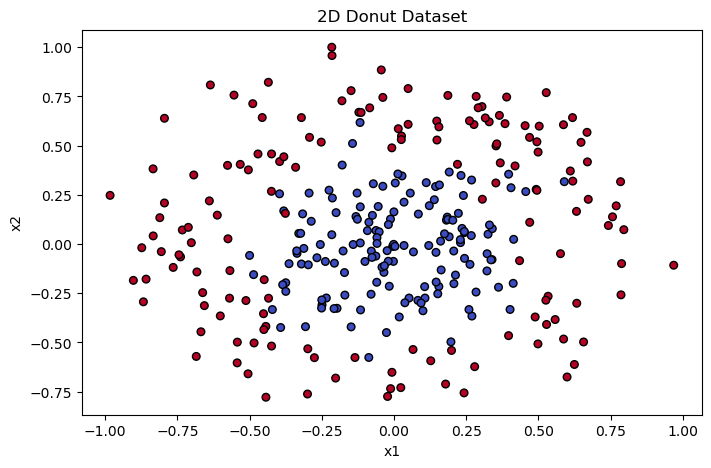

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def generate_donut_dataset(n_samples=300, noise=0.05, random_state=42):
    np.random.seed(random_state)
    
    n_inner = n_samples // 2
    n_outer = n_samples - n_inner

    # Inner circle (class 0)
    r_inner = 0.3 + noise * np.random.randn(n_inner)
    theta_inner = 2 * np.pi * np.random.rand(n_inner)
    x_inner = r_inner * np.cos(theta_inner)
    y_inner = r_inner * np.sin(theta_inner)
    label_inner = np.zeros(n_inner)

    # Outer circle (class 1)
    r_outer = 0.7 + noise * np.random.randn(n_outer)
    theta_outer = 2 * np.pi * np.random.rand(n_outer)
    x_outer = r_outer * np.cos(theta_outer)
    y_outer = r_outer * np.sin(theta_outer)
    label_outer = np.ones(n_outer)

    # Combine both rings
    X = np.vstack((
        np.column_stack((x_inner, y_inner)),
        np.column_stack((x_outer, y_outer))
    ))
    y = np.hstack((label_inner, label_outer))

    return X, y

# Generate and plot

# X2
X, y = generate_donut_dataset(n_samples=300, noise=0.15)
X2 = np.hstack((X[:, 0].reshape(-1,1),X[:, 1].reshape(-1,1)))
Y2 = y.reshape(-1,1)

plt.figure(figsize=(8, 5))
plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap='coolwarm', s=30, edgecolor='k')
plt.title("2D Donut Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [29]:
# X1 = X[:, 0].reshape(-1,1)
Y2.shape

(300, 1)

In [30]:
X2[:5]

array([[ 0.28414446, -0.24396211],
       [ 0.05211365, -0.27435472],
       [-0.2492282 , -0.30921842],
       [ 0.45630997,  0.26654333],
       [ 0.13963215,  0.22508373]])

## Data 

In [31]:
df = pd.read_csv("circular_dataset.csv")
df.head(3)

,x,y,label
0,-0.570186,0.573491,0.0
1,0.733469,-0.234684,0.0
2,-0.091351,-0.804003,0.0


In [32]:
df['label'].value_counts()

label
0.0    100
1.0    100
Name: count, dtype: int64

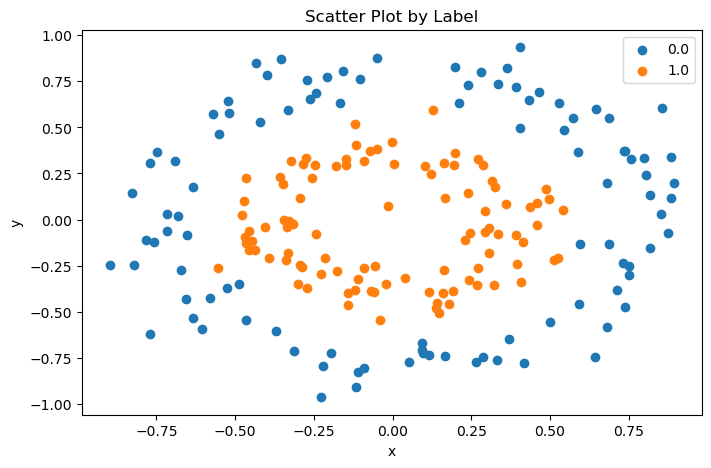

In [33]:
labels = df['label'].unique()
plt.figure(figsize = (8,5))
for label in labels:
    subset = df[df['label'] == label]
    
    plt.scatter(subset['x'], subset['y'], label=label)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot by Label')
plt.show()

In [34]:
Y = np.array(df['label']).reshape(-1, 1)
# Y.reshape(-1, 1) # -1 tells caluclate the number of rows and 1 is the number of columns
Y.shape

(200, 1)

In [35]:
x = np.array(df["x"])
y = np.array(df["y"])
# labels = np.array(df['label'])
X = np.vstack((x,y))
X = X.T
X[:5]

array([[-0.57018585,  0.57349054],
       [ 0.7334686 , -0.23468424],
       [-0.09135129, -0.80400303],
       [-0.4893774 , -0.34928933],
       [ 0.43319181,  0.6462816 ]])

## Creating the functions 

In [36]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

In [37]:
def cross_entropy_loss_function(X,y,theta, lam = 0 ) : 
    x_theta = np.dot(X, theta)
    sigma_x_theta = sigmoid(x_theta)
    theta_tilda = theta.copy()
    theta_tilda[0] = 0 
    return -np.mean(y*np.log(sigma_x_theta) + (1-y)*np.log(1 - sigma_x_theta) + ((lam*np.sum(theta_tilda**2))/len(X))) # THE LAST TERM IS L2 REGULARIZER

In [38]:
def feature_polynomial_expansion(features_data, power):
    transformed_features = np.empty((0, (power + 1) * (power + 2) // 2))  # general case for 2 vars
    
    for row in features_data:
        x1 = row[0]
        x2 = row[1]
        basis = []
        for i in range(power + 1):
            for j in range(i + 1):
                basis.append((x1 ** (i - j)) * (x2 ** j))
        transformed_features = np.vstack((transformed_features, np.array([basis])))
                  
    return transformed_features

In [39]:
def grad_func(X, Y, theta, lam = 0 ):
    #our gradient here is derivative of the loss function which : ((1/n)* np.dot(x_T, (sigma_x_theta - y)))
    n = len(X)
    x_T = X.T
    sigma_x_theta = sigmoid(np.dot(X,theta))
    theta_tilda = theta.copy()
    theta_tilda[0] = 0 
    
    return ((1/n)* np.dot(x_T, (sigma_x_theta - Y))) + ((2*lam*theta_tilda)/len(X))

In [40]:
X.shape

(200, 2)

In [41]:
# theta = np.zeros((6  ,1))
# X = feature_polynomial_expansion(X, 2)
# one = grad_func(X, Y, theta )
# # theta

In [22]:
# theta - (0.01 * one )

In [23]:
# X = feature_polynomial_expansion(X, 2)  # Make sure this returns np.array

# dimensions = X.shape[1]
# theta = np.zeros((dimensions, 1))

In [42]:
def logistic_regression(X, Y, learning_rate, iterations, power=1, lam = 0 ):
    X = np.array(X)
    Y = np.array(Y).reshape(-1, 1)  # Ensure Y is a column vector
    X = feature_polynomial_expansion(X, power)  # Make sure this returns np.array
    dimensions = X.shape[1]
    theta = np.zeros((dimensions, 1))    
    loss = []
    
    for i in range(iterations):
        grad = grad_func(X, Y, theta, lam)  # grad_func should return np.array shape (dimensions,1)
        theta -= learning_rate * grad
        i_loss = cross_entropy_loss_function(X,Y, theta, lam)
        loss.append(i_loss)
        
    plt.plot(range(iterations), loss)
    print(f"The final loss turns out to be : {loss[-1]}")
    return theta

In [43]:
def plot_decision_boundary(X_orig, Y, theta, power):
    # Create a grid of points
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1, X_orig[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = feature_polynomial_expansion(grid_points, power)
    probs = sigmoid(np.dot(grid_poly, theta)).reshape(xx.shape)

    # Plot original data
    plt.figure(figsize=(10, 8))
    plt.scatter(X_orig[Y.ravel() == 0][:, 0], X_orig[Y.ravel() == 0][:, 1], c='red', label='Class 0')
    plt.scatter(X_orig[Y.ravel() == 1][:, 0], X_orig[Y.ravel() == 1][:, 1], c='blue', label='Class 1')

    # Plot decision boundary
    plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, colors='black')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    


## Logistic Regression Algorithm (Without Regularization)

The final loss turns out to be : 0.08131786794271932


C:\Users\kondi\AppData\Local\Temp\ipykernel_24904\2796383477.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


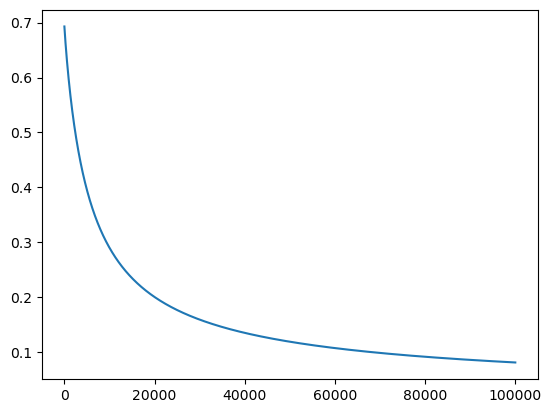

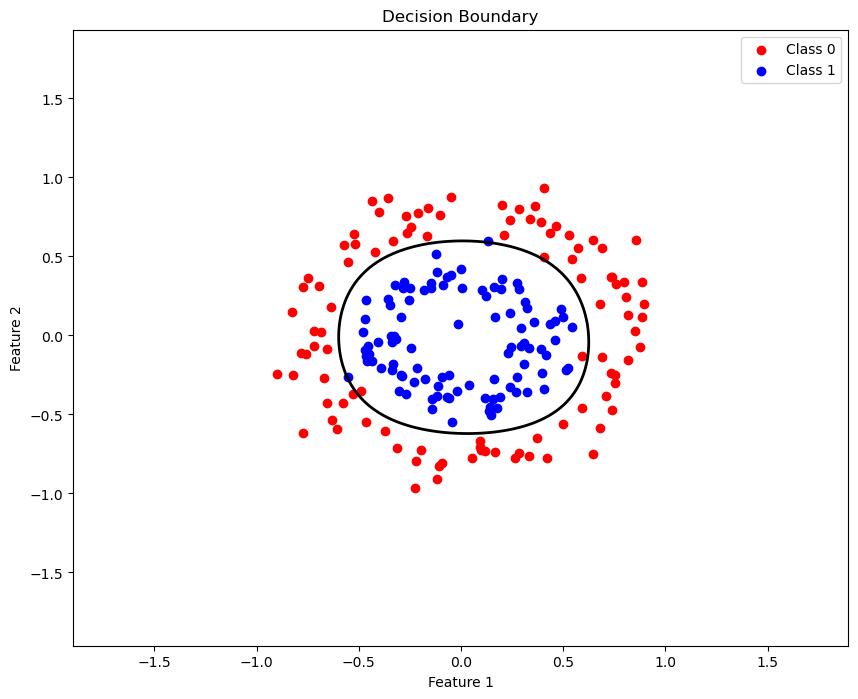

In [44]:
weights = logistic_regression(X, Y, 0.01,100000,15)
plot_decision_boundary(X, Y, weights, 15)

The final loss turns out to be : 0.18060365607053563


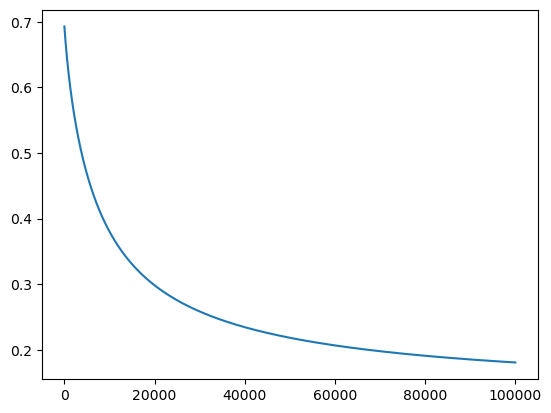

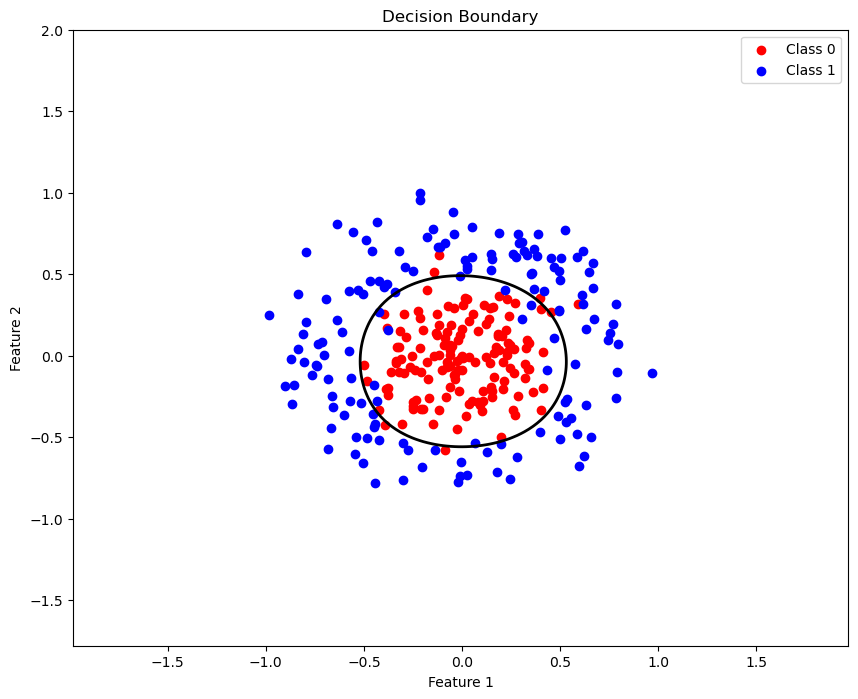

In [45]:
weights = logistic_regression(X2, Y2, 0.01,100000,20)
plot_decision_boundary(X2, Y2, weights, 20)

## Logistic Regression Algorithm (With Regularization)

The final loss turns out to be : 0.0723522899243528


C:\Users\kondi\AppData\Local\Temp\ipykernel_24904\2796383477.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


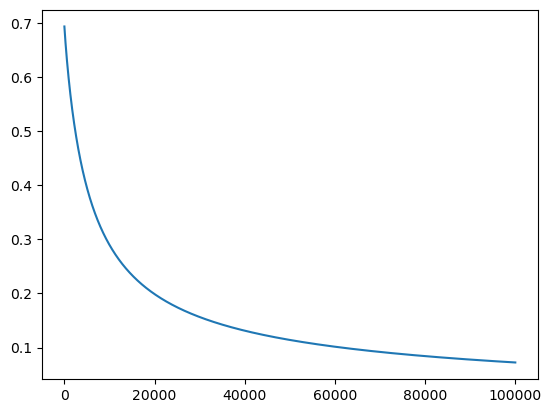

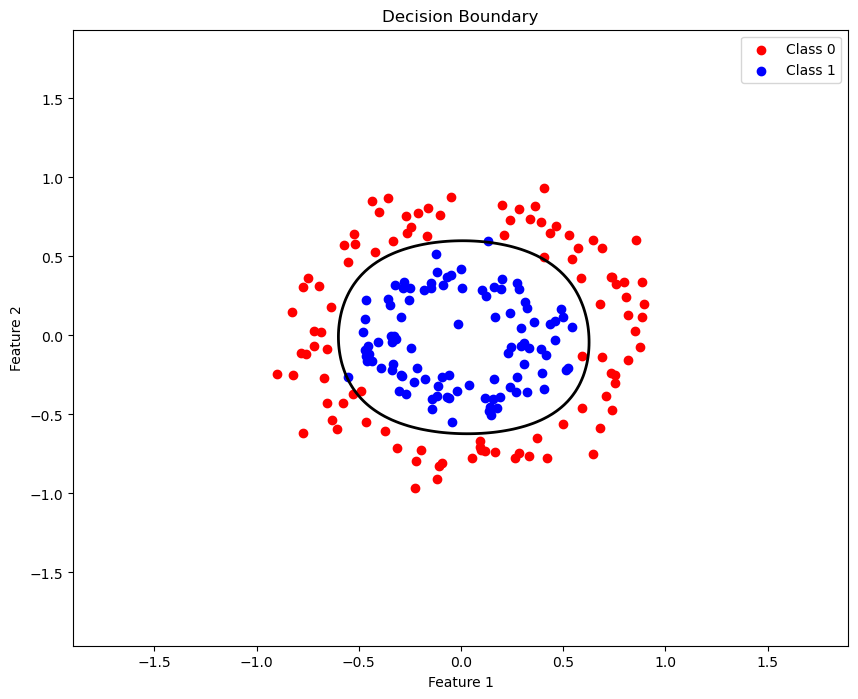

In [46]:
weights_l2 = logistic_regression(X, Y, 0.01,100000,20, lam = 0.01)
plot_decision_boundary(X, Y, weights_l2, 20)

The final loss turns out to be : 0.17482440567733432


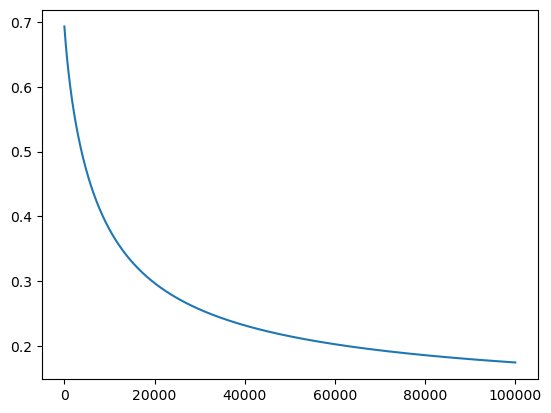

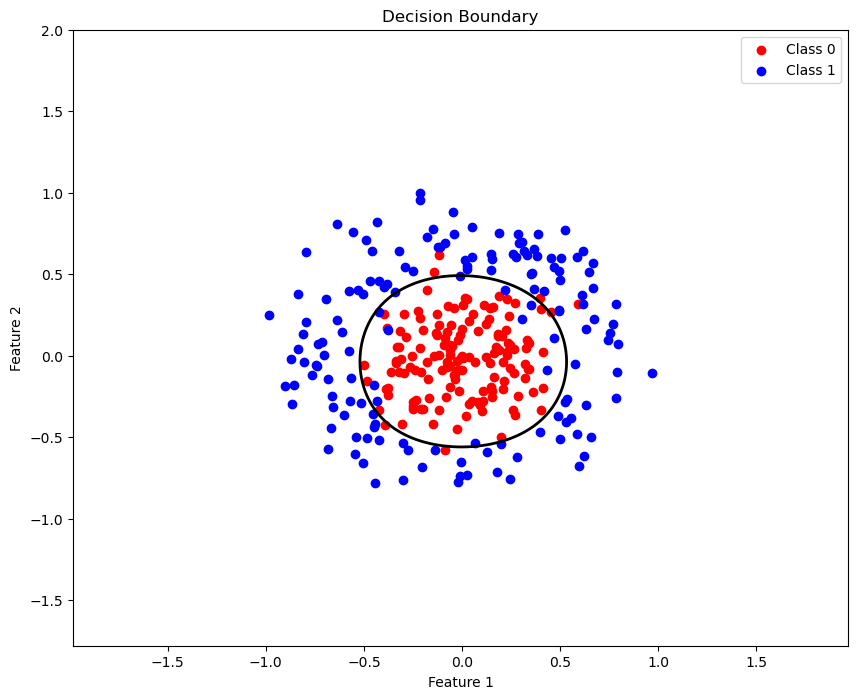

In [47]:
weights_l2 = logistic_regression(X2, Y2, 0.01,100000,20, lam = 0.01)
plot_decision_boundary(X2, Y2, weights_l2, 20)